# Clasificación de Tweets sobre desastres naturales


https://www.kaggle.com/vstepanenko/disaster-tweets

## 0. Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import emoji
import re, string
import nltk
import seaborn as sns
import pandas as pd
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

## 1. Lectura del conjunto de datos

In [2]:
df = pd.read_csv("tweets.csv")
df

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


## 2. Visualización del conjunto de datos

In [3]:
print("Tamaño del conjunto de datos de entrenamiento: ", len(df))

Tamaño del conjunto de datos de entrenamiento:  11370


In [4]:
# Tweets de cada tipo que se encuentran en el conjunto de datos de entrenamiento
df['target'].value_counts()

target
0    9256
1    2114
Name: count, dtype: int64

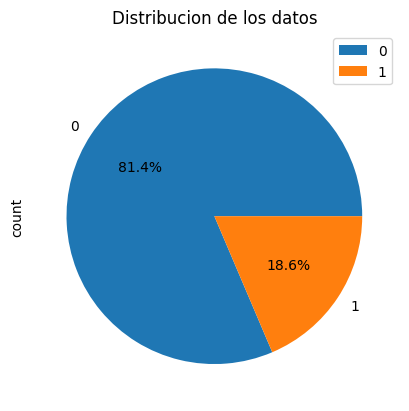

In [5]:
df['target'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Distribucion de los datos")
plt.legend()
plt.show()

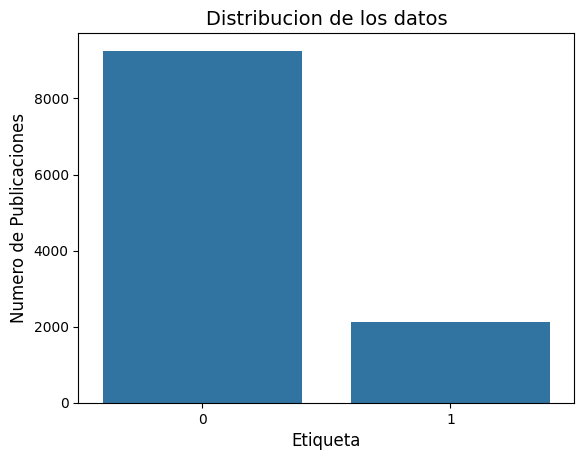

In [6]:
sns.countplot(x=df['target'])
plt.title("Distribucion de los datos", fontsize=14)
plt.xlabel("Etiqueta", fontsize=12)
plt.ylabel("Numero de Publicaciones",fontsize=12)
plt.show()

Analisis exploratorio de los datos

### Número de palabras por Tweet

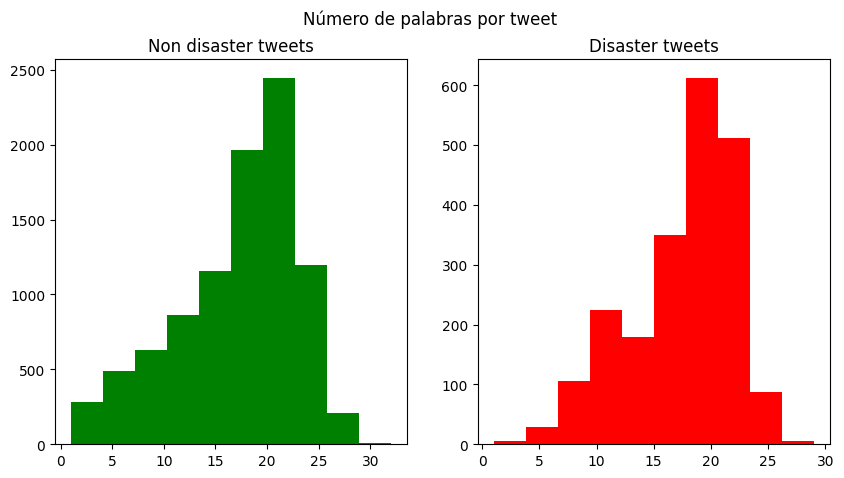

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Calculamos el número de palabras
tweet_len_0 = df[df['target'] == 0]['text'].str.split().map(lambda x: len(x))
tweet_len_1 = df[df['target'] == 1]['text'].str.split().map(lambda x: len(x))

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Número de palabras por tweet')

plt.show()

### Número de palabras únicas por Tweet

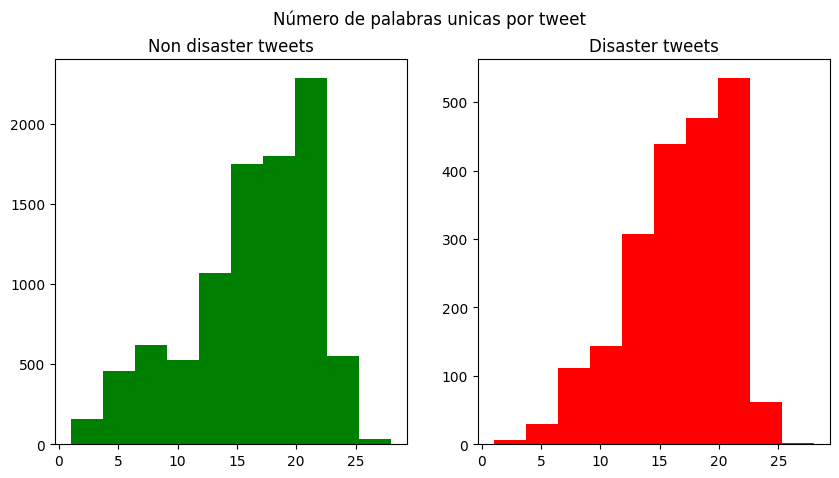

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Calculamos el número de palabras
tweet_len_0 = df[df['target'] == 0]['text'].str.split().map(lambda x: len(set(x)))
tweet_len_1 = df[df['target'] == 1]['text'].str.split().map(lambda x: len(set(x)))

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Número de palabras unicas por tweet')

plt.show()

### Longitud media de las palabras por Tweet

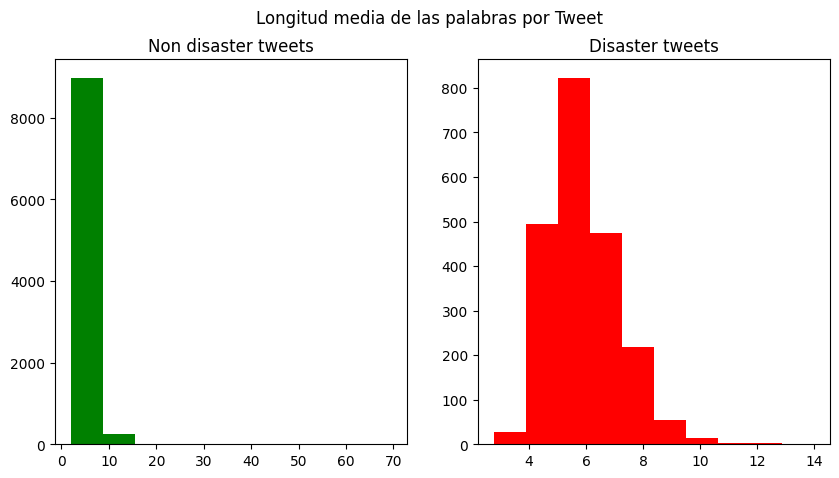

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Calculamos el número de palabras
tweet_len_0 = df[df['target'] == 0]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))
tweet_len_1 = df[df['target'] == 1]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Longitud media de las palabras por Tweet')

plt.show()

### Número de caracteres por tweet

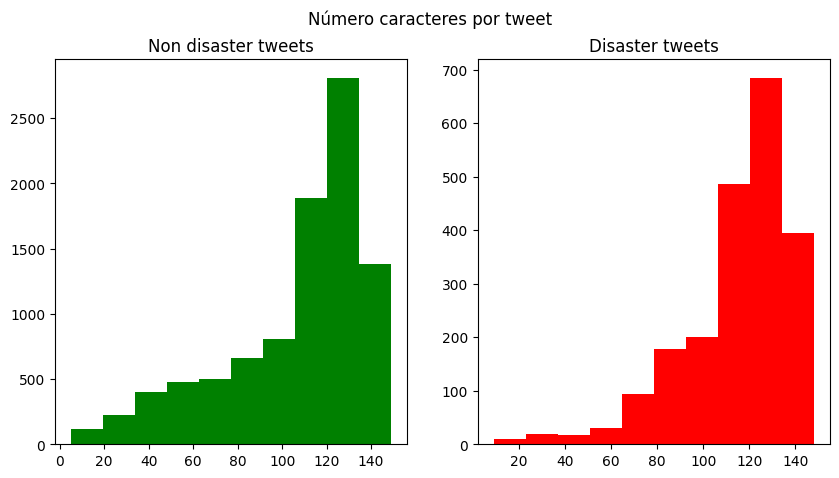

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Calculamos el número de caracteres por tweet
tweet_len_0 = df[df['target'] == 0]['text'].str.len()
tweet_len_1 = df[df['target'] == 1]['text'].str.len()

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Número caracteres por tweet')

plt.show()

### Stopwords más utilizadas

Estas palabras no tienen un significado por si solas, sino que modifican o acompañan a otras, este grupo suele estar conformado por artículos, pronombres, preposiciones, adverbios e incluso algunos verbos.

En el procesamiento de datos en lenguaje natural son filtradas antes o después del proceso en si, no se consideran por su nulo significado, en el caso de los buscadores como Google no lo consideran al momento de posicionar, pero si al momento de mostrar los resultados de búsqueda.

In [11]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
def plot_stopwords(label):
    tweets_stopwords = {}
    stop_words = set(stopwords.words('english'))

    for words in df[df['target'] == label]['text'].str.split():
        sw = list(set(words).intersection(stop_words))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1

    top = sorted(tweets_stopwords.items(), key=lambda x: x[1], reverse=True)[:10]
    plt.bar(*zip(*top))
    plt.show()

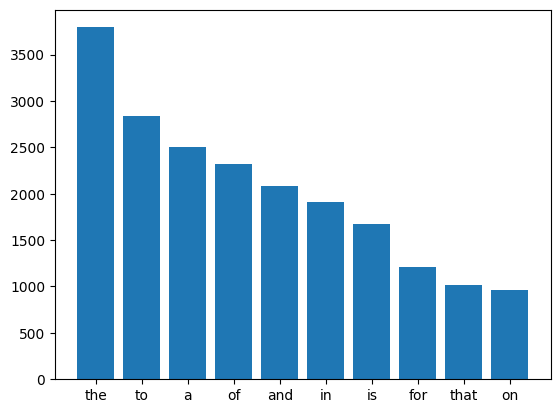

In [14]:
plot_stopwords(0)

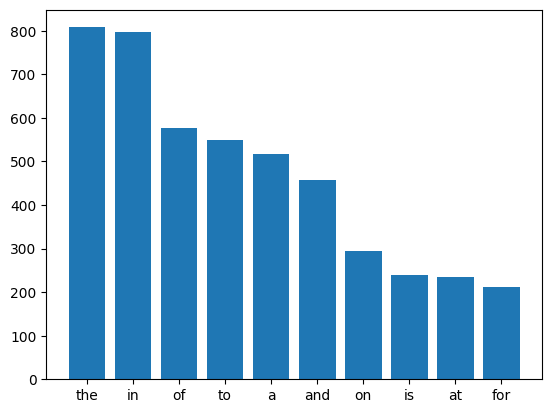

In [15]:
plot_stopwords(1)

### Análisis signos de puntuación

In [13]:

def plot_punctuation(label):
    tweets_stopwords = {}
    for words in df[df['target'] == label]['text'].str.split():
        sw = list(set(words).intersection(string.punctuation))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1

    top = sorted(tweets_stopwords.items(), key=lambda x:x[1],reverse=True)[:20]
    plt.figure(figsize=(10, 5))
    plt.bar(*zip(*top))
    plt.show()

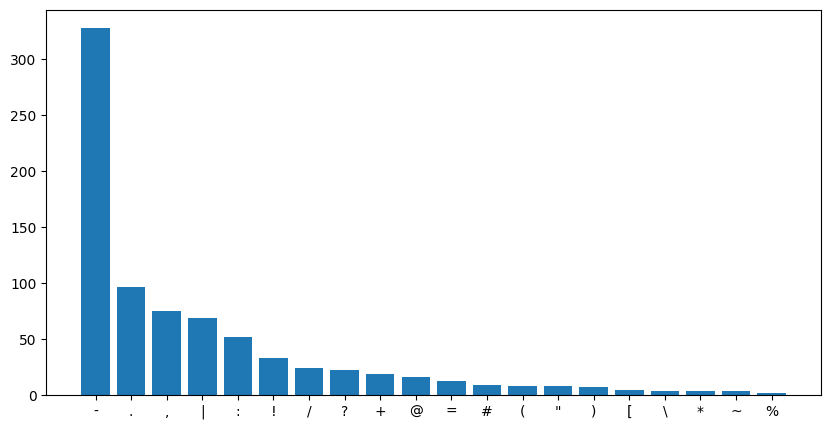

In [14]:
plot_punctuation(0)

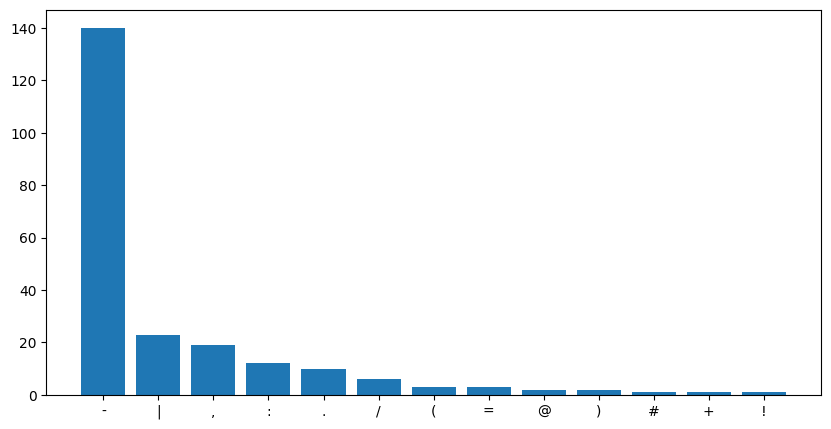

In [15]:
plot_punctuation(1)

### Análisis de Ngramas

In [14]:

cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(df['text']).sum(axis=0)

# Calculamos 
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

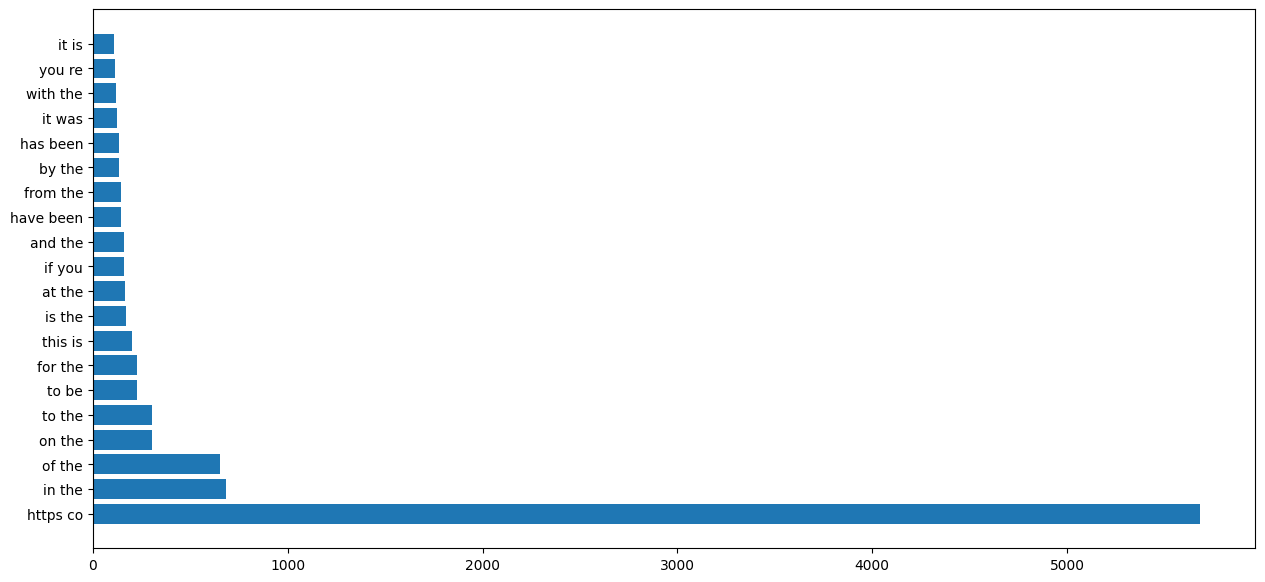

In [15]:
plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

## 3. Limpieza del conjunto de datos

In [16]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [17]:
remove_url("Esto es una prueba: http://localhost:8888/notebooks/Desktop/Workspace/Deep%20Neural%20Networks%20Course/11.%20Consideraciones%20de%20un%20proyecto%20de%20Deep%20Learning/code/Disaster%20Tweets.ipynb")

'Esto es una prueba: '

In [18]:
from html.parser import HTMLParser

class HTMLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs = True
        self.fed = []

    def handle_data(self, d):
        self.fed.append(d)

    def get_data(self):
        return ''.join(self.fed)

def remove_html(text):
    s = HTMLStripper()
    s.feed(text)
    return s.get_data()

In [19]:
remove_html('<tr><td align="left"><a href="../../issues/51/16.html#article">Phrack World News</a></td>')

'Phrack World News'

In [20]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [21]:
remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [22]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [23]:
remove_punctuation("hola #que tal")

'hola que tal'

In [24]:
# Aplicamos nuestras funciones de limpieza del conjunto de datos
df_prep = df.copy()

df_prep['text'] = df['text'].apply(remove_url)
df_prep['text'] = df['text'].apply(remove_html)
df_prep['text'] = df['text'].apply(remove_emoji)
df_prep['text'] = df['text'].apply(remove_punctuation)

In [25]:
cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(df_prep['text']).sum(axis=0)

# Calculamos 
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

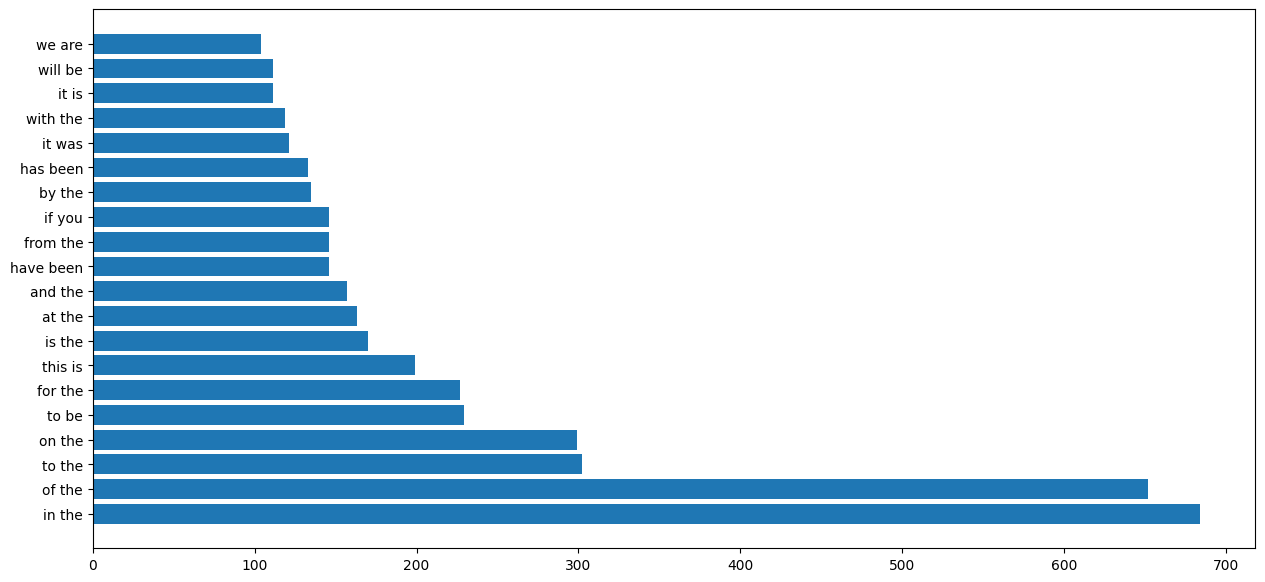

In [26]:
plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

## 4. Vectorización del conjunto de datos

In [150]:
Y_train = df_prep['target']

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

df = vectorizer.fit_transform(df_prep['text'])

In [151]:
df = df.toarray()
df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 5. División del conjunto de datos

In [152]:
X_train, X_temp, Y_train, Y_temp = train_test_split(df, Y_train, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [153]:
print("Longitud subcojunto de entrenamiento: ", len(X_train))
print("Longitud subconjunto de validación: ", len(X_val))
print("Longitud subconjutno de pruebas: ", len(X_test))

Longitud subcojunto de entrenamiento:  9096
Longitud subconjunto de validación:  1137
Longitud subconjutno de pruebas:  1137


In [178]:
Y_train.value_counts()

target
0    7419
1    1677
Name: count, dtype: int64

In [32]:
Y_test.value_counts()

target
0    934
1    203
Name: count, dtype: int64

In [198]:
X_train.shape[1]

9096

## 6. Construcción del modelo

In [226]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))

In [227]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                453024    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 453313 (1.73 MB)
Trainable params: 453313 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [228]:
history = model.fit(
    X_train,
    Y_train,
    epochs=30,
    batch_size=1024,
    validation_data=(X_val, Y_val))

Epoch 1/30
9/9 [==============================] - 2s 78ms/step - loss: 0.6876 - accuracy: 0.6680 - precision: 0.1896 - val_loss: 0.6772 - val_accuracy: 0.8091 - val_precision: 0.0000e+00
Epoch 2/30
9/9 [==============================] - 0s 42ms/step - loss: 0.6700 - accuracy: 0.7736 - precision: 0.1565 - val_loss: 0.6573 - val_accuracy: 0.8091 - val_precision: 0.0000e+00
Epoch 3/30
9/9 [==============================] - 0s 46ms/step - loss: 0.6511 - accuracy: 0.7724 - precision: 0.1313 - val_loss: 0.6334 - val_accuracy: 0.8091 - val_precision: 0.0000e+00
Epoch 4/30
9/9 [==============================] - 0s 45ms/step - loss: 0.6266 - accuracy: 0.7794 - precision: 0.1233 - val_loss: 0.6067 - val_accuracy: 0.8091 - val_precision: 0.0000e+00
Epoch 5/30
9/9 [==============================] - 0s 43ms/step - loss: 0.6023 - accuracy: 0.7805 - precision: 0.1098 - val_loss: 0.5787 - val_accuracy: 0.8091 - val_precision: 0.0000e+00
Epoch 6/30
9/9 [==============================] - 0s 41ms/step - 

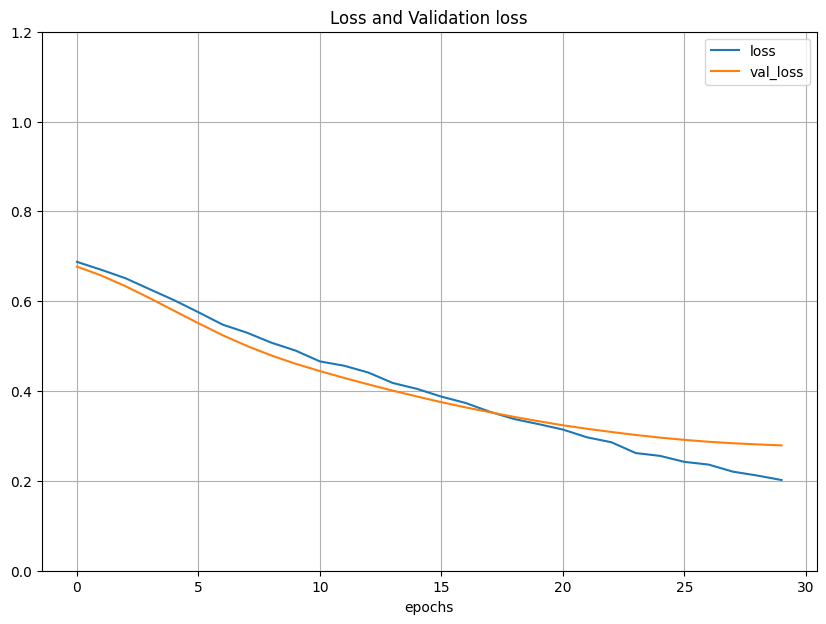

In [229]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.title('Loss and Validation loss')
plt.xlabel("epochs")
plt.show()

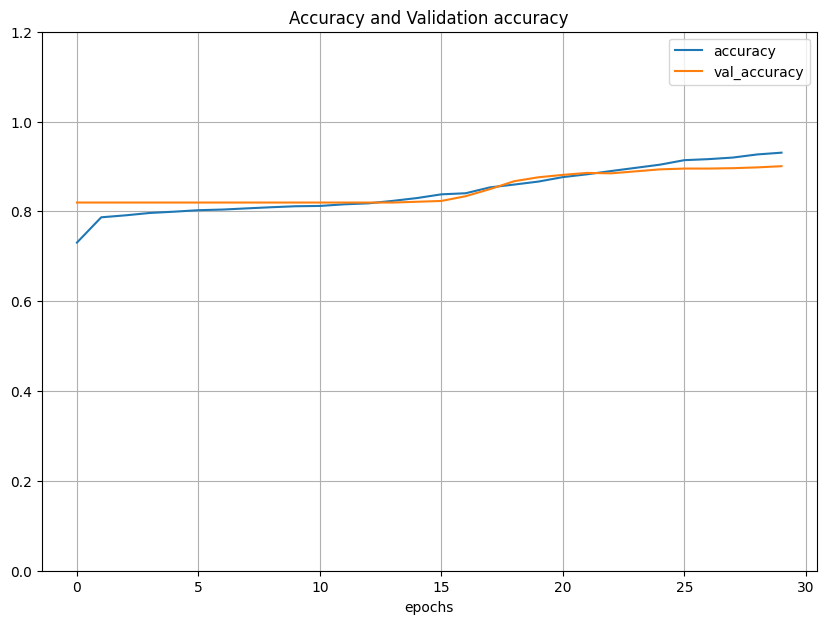

In [39]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.title('Accuracy and Validation accuracy')
plt.xlabel("epochs")
plt.show()

## 7. Evaluación del modelo

In [40]:
Y_pred = model.predict(X_test).round(0)

# Comparar predicciones con las etiquetas reales
from sklearn.metrics import accuracy_score, precision_score

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')

36/36 [==============================] - 0s 2ms/step
Accuracy: 0.91
Precision: 0.87


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [42]:
# matriz de confucion
mc = confusion_matrix(Y_test,Y_pred)
mc

array([[917,  17],
       [ 90, 113]], dtype=int64)

In [49]:
Y_test.value_counts()

target
0    937
1    200
Name: count, dtype: int64

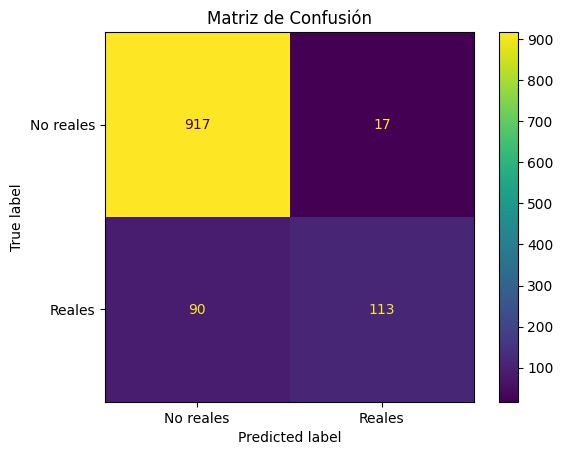

In [43]:
#visualizar la matriz de confusion
vis = ConfusionMatrixDisplay(mc,display_labels=['No reales', 'Reales'])
vis.plot()
plt.title('Matriz de Confusión')
plt.show()